In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "../data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [4]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(
    X_train, y_train_90d, epochs=1000, batch_size=64,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 1s 28us/step - loss: 0.6866 - acc: 0.5851 - val_loss: 0.6915 - val_acc: 0.5520
Epoch 2/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6762 - acc: 0.6081 - val_loss: 0.6879 - val_acc: 0.5508
Epoch 3/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6700 - acc: 0.6130 - val_loss: 0.6860 - val_acc: 0.5517
Epoch 4/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6647 - acc: 0.6152 - val_loss: 0.6844 - val_acc: 0.5521
Epoch 5/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6601 - acc: 0.6163 - val_loss: 0.6830 - val_acc: 0.5514
Epoch 6/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6562 - acc: 0.6175 - val_loss: 0.6819 - val_acc: 0.5521
Epoch 7/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6528 - acc: 0.6188 - val_loss: 0.6

27584/27584 [==============================] - 1s 21us/step - loss: 0.6099 - acc: 0.6565 - val_loss: 0.6402 - val_acc: 0.6236
Epoch 60/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6100 - acc: 0.6572 - val_loss: 0.6411 - val_acc: 0.6219
Epoch 61/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6095 - acc: 0.6572 - val_loss: 0.6419 - val_acc: 0.6243
Epoch 62/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6096 - acc: 0.6600 - val_loss: 0.6411 - val_acc: 0.6242
Epoch 63/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6095 - acc: 0.6580 - val_loss: 0.6424 - val_acc: 0.6222
Epoch 64/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6096 - acc: 0.6579 - val_loss: 0.6433 - val_acc: 0.6195
Epoch 65/1000
27584/27584 [==============================] - 1s 26us/step - loss: 0.6092 - acc: 0.6566 - val_loss: 0.6440 - val_acc: 0.6155
Epoch 66/1000
27584/27584 [=======

27584/27584 [==============================] - 1s 21us/step - loss: 0.6072 - acc: 0.6596 - val_loss: 0.6444 - val_acc: 0.6181
Epoch 118/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6073 - acc: 0.6591 - val_loss: 0.6451 - val_acc: 0.6191
Epoch 119/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6072 - acc: 0.6584 - val_loss: 0.6449 - val_acc: 0.6237
Epoch 120/1000
27584/27584 [==============================] - 1s 26us/step - loss: 0.6072 - acc: 0.6595 - val_loss: 0.6443 - val_acc: 0.6198
Epoch 121/1000
27584/27584 [==============================] - 1s 25us/step - loss: 0.6072 - acc: 0.6575 - val_loss: 0.6447 - val_acc: 0.6058
Epoch 122/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6073 - acc: 0.6588 - val_loss: 0.6449 - val_acc: 0.6156
Epoch 123/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6071 - acc: 0.6598 - val_loss: 0.6482 - val_acc: 0.6114
Epoch 124/1000
27584/27584 [

27584/27584 [==============================] - 1s 25us/step - loss: 0.6063 - acc: 0.6589 - val_loss: 0.6475 - val_acc: 0.6029
Epoch 176/1000
27584/27584 [==============================] - 1s 24us/step - loss: 0.6061 - acc: 0.6593 - val_loss: 0.6448 - val_acc: 0.6037
Epoch 177/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6061 - acc: 0.6608 - val_loss: 0.6460 - val_acc: 0.6039
Epoch 178/1000
27584/27584 [==============================] - 1s 24us/step - loss: 0.6061 - acc: 0.6613 - val_loss: 0.6455 - val_acc: 0.6120
Epoch 179/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6059 - acc: 0.6596 - val_loss: 0.6463 - val_acc: 0.6062
Epoch 180/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6058 - acc: 0.6598 - val_loss: 0.6480 - val_acc: 0.6053
Epoch 181/1000
27584/27584 [==============================] - 1s 24us/step - loss: 0.6060 - acc: 0.6598 - val_loss: 0.6460 - val_acc: 0.6055
Epoch 182/1000
27584/27584 [

27584/27584 [==============================] - 1s 23us/step - loss: 0.6056 - acc: 0.6605 - val_loss: 0.6468 - val_acc: 0.6123
Epoch 234/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6054 - acc: 0.6605 - val_loss: 0.6474 - val_acc: 0.6151
Epoch 235/1000
27584/27584 [==============================] - 1s 24us/step - loss: 0.6052 - acc: 0.6593 - val_loss: 0.6461 - val_acc: 0.6059
Epoch 236/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6053 - acc: 0.6587 - val_loss: 0.6502 - val_acc: 0.6068
Epoch 237/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6055 - acc: 0.6595 - val_loss: 0.6451 - val_acc: 0.6059
Epoch 238/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6052 - acc: 0.6600 - val_loss: 0.6482 - val_acc: 0.6013
Epoch 239/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6053 - acc: 0.6598 - val_loss: 0.6460 - val_acc: 0.6032
Epoch 240/1000
27584/27584 [

Epoch 291/1000
27584/27584 [==============================] - 1s 26us/step - loss: 0.6051 - acc: 0.6599 - val_loss: 0.6477 - val_acc: 0.6135
Epoch 292/1000
27584/27584 [==============================] - 1s 30us/step - loss: 0.6052 - acc: 0.6600 - val_loss: 0.6485 - val_acc: 0.5994
Epoch 293/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6051 - acc: 0.6598 - val_loss: 0.6467 - val_acc: 0.6040
Epoch 294/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6049 - acc: 0.6615 - val_loss: 0.6456 - val_acc: 0.6029
Epoch 295/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6051 - acc: 0.6608 - val_loss: 0.6465 - val_acc: 0.6004
Epoch 296/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6052 - acc: 0.6607 - val_loss: 0.6457 - val_acc: 0.6030
Epoch 297/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6051 - acc: 0.6605 - val_loss: 0.6474 - val_acc: 0.6003
Epoch 298/100

27584/27584 [==============================] - 1s 26us/step - loss: 0.6047 - acc: 0.6590 - val_loss: 0.6572 - val_acc: 0.6024
Epoch 350/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6047 - acc: 0.6614 - val_loss: 0.6459 - val_acc: 0.6001
Epoch 351/1000
27584/27584 [==============================] - 1s 26us/step - loss: 0.6048 - acc: 0.6608 - val_loss: 0.6488 - val_acc: 0.5981
Epoch 352/1000
27584/27584 [==============================] - 1s 29us/step - loss: 0.6050 - acc: 0.6593 - val_loss: 0.6475 - val_acc: 0.6004
Epoch 353/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6046 - acc: 0.6619 - val_loss: 0.6482 - val_acc: 0.6011
Epoch 354/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6048 - acc: 0.6612 - val_loss: 0.6471 - val_acc: 0.6024
Epoch 355/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6046 - acc: 0.6598 - val_loss: 0.6452 - val_acc: 0.5995
Epoch 356/1000
27584/27584 [

27584/27584 [==============================] - 1s 23us/step - loss: 0.6041 - acc: 0.6599 - val_loss: 0.6537 - val_acc: 0.6037
Epoch 408/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6045 - acc: 0.6599 - val_loss: 0.6469 - val_acc: 0.6008
Epoch 409/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6041 - acc: 0.6603 - val_loss: 0.6502 - val_acc: 0.6010
Epoch 410/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6038 - acc: 0.6616 - val_loss: 0.6465 - val_acc: 0.6085
Epoch 411/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6042 - acc: 0.6611 - val_loss: 0.6488 - val_acc: 0.6014
Epoch 412/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6043 - acc: 0.6607 - val_loss: 0.6472 - val_acc: 0.6003
Epoch 413/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6045 - acc: 0.6607 - val_loss: 0.6475 - val_acc: 0.5992
Epoch 414/1000
27584/27584 [

27584/27584 [==============================] - 1s 19us/step - loss: 0.6039 - acc: 0.6599 - val_loss: 0.6462 - val_acc: 0.5979
Epoch 466/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6039 - acc: 0.6585 - val_loss: 0.6468 - val_acc: 0.5997
Epoch 467/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6039 - acc: 0.6622 - val_loss: 0.6471 - val_acc: 0.5992
Epoch 468/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6041 - acc: 0.6613 - val_loss: 0.6459 - val_acc: 0.5984
Epoch 469/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6041 - acc: 0.6592 - val_loss: 0.6489 - val_acc: 0.5975
Epoch 470/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6038 - acc: 0.6608 - val_loss: 0.6485 - val_acc: 0.6035
Epoch 471/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6039 - acc: 0.6613 - val_loss: 0.6472 - val_acc: 0.5984
Epoch 472/1000
27584/27584 [

Epoch 523/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6033 - acc: 0.6640 - val_loss: 0.6477 - val_acc: 0.6053
Epoch 524/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6035 - acc: 0.6608 - val_loss: 0.6469 - val_acc: 0.6053
Epoch 525/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6039 - acc: 0.6628 - val_loss: 0.6534 - val_acc: 0.5955
Epoch 526/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6034 - acc: 0.6613 - val_loss: 0.6482 - val_acc: 0.5961
Epoch 527/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6038 - acc: 0.6602 - val_loss: 0.6482 - val_acc: 0.6075
Epoch 528/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6036 - acc: 0.6606 - val_loss: 0.6501 - val_acc: 0.5990
Epoch 529/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6034 - acc: 0.6605 - val_loss: 0.6513 - val_acc: 0.5961
Epoch 530/100

27584/27584 [==============================] - 1s 18us/step - loss: 0.6033 - acc: 0.6597 - val_loss: 0.6491 - val_acc: 0.6079
Epoch 581/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6034 - acc: 0.6612 - val_loss: 0.6469 - val_acc: 0.5997
Epoch 582/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6036 - acc: 0.6602 - val_loss: 0.6470 - val_acc: 0.6062
Epoch 583/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6031 - acc: 0.6619 - val_loss: 0.6511 - val_acc: 0.6077
Epoch 584/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6034 - acc: 0.6612 - val_loss: 0.6501 - val_acc: 0.5963
Epoch 585/1000
27584/27584 [==============================] - 1s 26us/step - loss: 0.6032 - acc: 0.6611 - val_loss: 0.6482 - val_acc: 0.6000
Epoch 586/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6033 - acc: 0.6618 - val_loss: 0.6474 - val_acc: 0.6064
Epoch 587/1000
27584/27584 [

Epoch 638/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6032 - acc: 0.6604 - val_loss: 0.6475 - val_acc: 0.6010
Epoch 639/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6034 - acc: 0.6616 - val_loss: 0.6465 - val_acc: 0.5985
Epoch 640/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6031 - acc: 0.6609 - val_loss: 0.6466 - val_acc: 0.6000
Epoch 641/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6031 - acc: 0.6610 - val_loss: 0.6492 - val_acc: 0.5963
Epoch 642/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6031 - acc: 0.6609 - val_loss: 0.6462 - val_acc: 0.6062
Epoch 643/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6033 - acc: 0.6622 - val_loss: 0.6475 - val_acc: 0.6004
Epoch 644/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6033 - acc: 0.6618 - val_loss: 0.6482 - val_acc: 0.6007
Epoch 645/100

27584/27584 [==============================] - 0s 18us/step - loss: 0.6030 - acc: 0.6602 - val_loss: 0.6524 - val_acc: 0.5958
Epoch 697/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6029 - acc: 0.6592 - val_loss: 0.6490 - val_acc: 0.5963
Epoch 698/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6030 - acc: 0.6619 - val_loss: 0.6498 - val_acc: 0.5987A: 0s - loss: 0.6022 - acc: 0.6
Epoch 699/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6026 - acc: 0.6627 - val_loss: 0.6485 - val_acc: 0.6001
Epoch 700/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6030 - acc: 0.6619 - val_loss: 0.6479 - val_acc: 0.5968
Epoch 701/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6028 - acc: 0.6614 - val_loss: 0.6510 - val_acc: 0.6116
Epoch 702/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6030 - acc: 0.6605 - val_loss: 0.6476 - val_acc: 0.60

Epoch 754/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6031 - acc: 0.6614 - val_loss: 0.6476 - val_acc: 0.6048
Epoch 755/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6027 - acc: 0.6612 - val_loss: 0.6468 - val_acc: 0.5971
Epoch 756/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6026 - acc: 0.6597 - val_loss: 0.6471 - val_acc: 0.6003
Epoch 757/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6031 - acc: 0.6619 - val_loss: 0.6495 - val_acc: 0.5959
Epoch 758/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6028 - acc: 0.6602 - val_loss: 0.6466 - val_acc: 0.5991
Epoch 759/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6029 - acc: 0.6624 - val_loss: 0.6484 - val_acc: 0.6169
Epoch 760/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6026 - acc: 0.6610 - val_loss: 0.6502 - val_acc: 0.6145
Epoch 761/100

Epoch 812/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6025 - acc: 0.6623 - val_loss: 0.6461 - val_acc: 0.6053
Epoch 813/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6024 - acc: 0.6607 - val_loss: 0.6484 - val_acc: 0.5969
Epoch 814/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6026 - acc: 0.6606 - val_loss: 0.6524 - val_acc: 0.6043
Epoch 815/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6027 - acc: 0.6622 - val_loss: 0.6478 - val_acc: 0.5994
Epoch 816/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6027 - acc: 0.6624 - val_loss: 0.6483 - val_acc: 0.6048
Epoch 817/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6026 - acc: 0.6614 - val_loss: 0.6484 - val_acc: 0.6143
Epoch 818/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6028 - acc: 0.6619 - val_loss: 0.6469 - val_acc: 0.6059
Epoch 819/100

Epoch 870/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6026 - acc: 0.6601 - val_loss: 0.6478 - val_acc: 0.5979
Epoch 871/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6023 - acc: 0.6622 - val_loss: 0.6480 - val_acc: 0.5991
Epoch 872/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6022 - acc: 0.6619 - val_loss: 0.6476 - val_acc: 0.6084
Epoch 873/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6027 - acc: 0.6620 - val_loss: 0.6487 - val_acc: 0.5974
Epoch 874/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6023 - acc: 0.6627 - val_loss: 0.6480 - val_acc: 0.5978A: 0s - loss: 0.6019 - acc: 0.663
Epoch 875/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6022 - acc: 0.6628 - val_loss: 0.6472 - val_acc: 0.6052
Epoch 876/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6029 - acc: 0.6605 - val_loss: 0.648

27584/27584 [==============================] - 0s 17us/step - loss: 0.6022 - acc: 0.6631 - val_loss: 0.6493 - val_acc: 0.5994
Epoch 928/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6023 - acc: 0.6615 - val_loss: 0.6491 - val_acc: 0.6061
Epoch 929/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6025 - acc: 0.6617 - val_loss: 0.6493 - val_acc: 0.6053
Epoch 930/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6022 - acc: 0.6614 - val_loss: 0.6486 - val_acc: 0.5994
Epoch 931/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6021 - acc: 0.6621 - val_loss: 0.6487 - val_acc: 0.5972
Epoch 932/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6022 - acc: 0.6624 - val_loss: 0.6469 - val_acc: 0.5994
Epoch 933/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6022 - acc: 0.6606 - val_loss: 0.6481 - val_acc: 0.6053
Epoch 934/1000
27584/27584 [

27584/27584 [==============================] - 0s 18us/step - loss: 0.6023 - acc: 0.6634 - val_loss: 0.6481 - val_acc: 0.5988
Epoch 986/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6018 - acc: 0.6626 - val_loss: 0.6473 - val_acc: 0.5997
Epoch 987/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6022 - acc: 0.6616 - val_loss: 0.6468 - val_acc: 0.6052
Epoch 988/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6022 - acc: 0.6620 - val_loss: 0.6487 - val_acc: 0.6000
Epoch 989/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6023 - acc: 0.6614 - val_loss: 0.6532 - val_acc: 0.5917
Epoch 990/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6023 - acc: 0.6620 - val_loss: 0.6480 - val_acc: 0.6040
Epoch 991/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6024 - acc: 0.6602 - val_loss: 0.6483 - val_acc: 0.6056
Epoch 992/1000
27584/27584 [

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179BC1FFB00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000179BC3F2390>]], dtype=object)

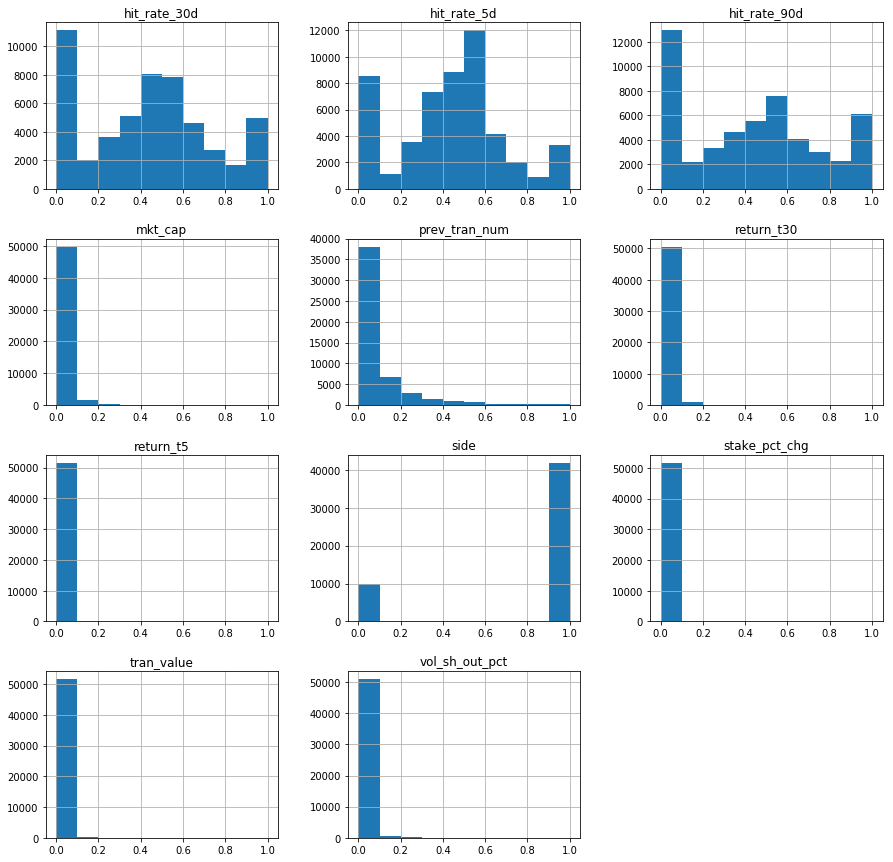

In [6]:
df[col_list].hist(figsize = [15,15])

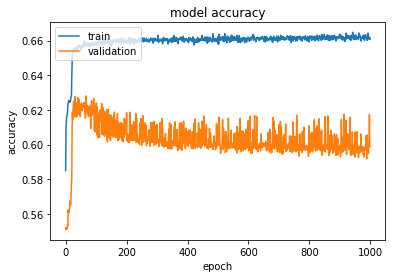

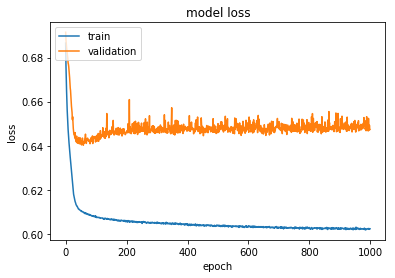

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
# evaluate the model
scores = model.evaluate(X_train, y_train_90d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_90d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 18us/step
[Train] acc: 65.09%
17240/17240 [==============================] - 0s 18us/step
[Test] acc: 63.38%
